In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
# from keras.models import Sequential
# from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
# from keras.models import load_model
# from keras.layers import LSTM
# from keras.utils.vis_utils import plot_model


In [2]:
#Get the Dataset
df=pd.read_csv("BACstock.csv",na_values=['null'],index_col='date',parse_dates=True,infer_datetime_format=True)
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,11.86,11.90,11.72,11.760,145217221,BAC
2013-02-11,11.73,11.90,11.67,11.860,103499848,BAC
2013-02-12,11.87,12.34,11.78,12.245,231771561,BAC
2013-02-13,12.35,12.42,12.05,12.170,192478919,BAC
2013-02-14,12.09,12.27,12.07,12.130,143901737,BAC


In [3]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1259, 6)
Null Value Present:  False


<AxesSubplot:xlabel='date'>

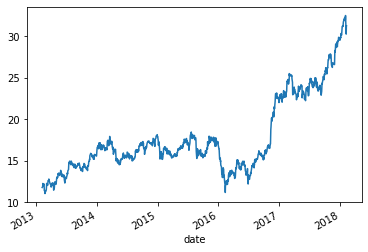

In [4]:
#Plot the True Adj Close Value
df["close"].plot()

In [6]:
#Set Target Variable
output_var = pd.DataFrame(df["close"])
#Selecting the Features
features = ['open', 'high', 'low', 'volume']

In [7]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,open,high,low,volume
date,,,,
2013-02-08,0.034709,0.031702,0.034906,0.362911
2013-02-11,0.028612,0.031702,0.032547,0.247291
2013-02-12,0.035178,0.052214,0.037736,0.602796
2013-02-13,0.057692,0.055944,0.050472,0.493897
2013-02-14,0.045497,0.048951,0.051415,0.359265


In [10]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [11]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [14]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
# from keras.optimizers import Adam
from keras.models import load_model

from keras.utils.vis_utils import plot_model



In [16]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [17]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
144/144 [==============================] - 1s 2ms/step - loss: 275.4045
Epoch 2/100
144/144 [==============================] - 0s 2ms/step - loss: 221.7242
Epoch 3/100
144/144 [==============================] - 0s 3ms/step - loss: 130.0620
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 46.4802
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 11.8263
Epoch 6/100
144/144 [==============================] - 0s 2ms/step - loss: 5.5239
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: 4.5099
Epoch 8/100
144/144 [==============================] - 0s 2ms/step - loss: 4.0735
Epoch 9/100
144/144 [==============================] - 0s 2ms/step - loss: 3.7189
Epoch 10/100
144/144 [==============================] - 0s 2ms/step - loss: 3.3905
Epoch 11/100
144/144 [==============================] - 0s 2ms/step - loss: 3.0814
Epoch 12/100
144/144 [==============================] - 0s 2ms/step - loss: 2.7730
Epoch

In [20]:
#LSTM Prediction
y_pred= lstm.predict(X_test)
y_pred

array([[23.944582],
       [23.80921 ],
       [23.40312 ],
       [23.811811],
       [23.961924],
       [23.993849],
       [23.58339 ],
       [23.454111],
       [23.156546],
       [23.06047 ],
       [23.274912],
       [23.661966],
       [24.054638],
       [24.36957 ],
       [24.248634],
       [24.54061 ],
       [24.77384 ],
       [24.891962],
       [25.067179],
       [24.954607],
       [24.838995],
       [24.81954 ],
       [25.307158],
       [25.466097],
       [25.356735],
       [25.47132 ],
       [25.719019],
       [25.784086],
       [25.834406],
       [26.12092 ],
       [26.006344],
       [25.7893  ],
       [25.776394],
       [25.622023],
       [25.409563],
       [25.958706],
       [26.22569 ],
       [26.334354],
       [26.250095],
       [26.882013],
       [27.098898],
       [27.329775],
       [27.5011  ],
       [27.631071],
       [27.594011],
       [27.471022],
       [27.412031],
       [27.42807 ],
       [27.419264],
       [27.587317],


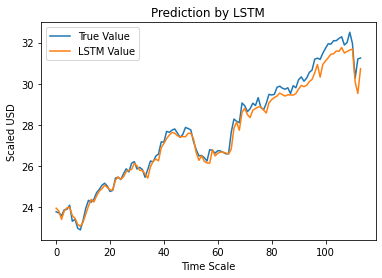

In [21]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
LSTMacc = round((accuracy_score(y_test,y_pred)*100),2)
print(LSTMacc)

ValueError: continuous is not supported